In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def deskew_and_display(path, save_image=False, save_path="deskewed_image.jpg"):
    # Step 1: Load and Normalize Image
    img = cv2.imread(path)
    resized_height = 480
    percent = resized_height / len(img)
    resized_width = int(percent * len(img[0]))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (9, 9), 0)
    
    gray = cv2.resize(gray, (resized_width, resized_height))

    # Optional: Add a border (cropping in this case)
    try:
        start_point = (0, 0)
        end_point = (gray.shape[0], gray.shape[1])
        color = (255, 255, 255)
        thickness = 10
        gray = cv2.rectangle(gray, start_point, end_point, color, thickness)
    except Exception as e:
        print(f"Failed to crop border: {e}")
    
    # Invert the image
    gray = cv2.bitwise_not(gray)

    # Step 2: Get Skew Angle
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel)
    contours, _ = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    angles = []
    for contour in contours:
        minAreaRect = cv2.minAreaRect(contour)
        angle = minAreaRect[-1]
        if angle != 90.0 and angle != -0.0:
            angles.append(angle)
    
    if len(angles) > 0:
        angles.sort()
        mid_angle = angles[len(angles) // 2]
    else:
        mid_angle = 0  # Default to 0 if no valid angles are found
    
    # Correct the angle if needed
    if mid_angle > 45:
        mid_angle = -(90 - mid_angle)

    # Step 3: Deskew the Image
    height, width = img.shape[:2]
    m = cv2.getRotationMatrix2D((width / 2, height / 2), mid_angle, 1)
    deskewed = cv2.warpAffine(img, m, (width, height), borderValue=(255, 255, 255))

    # Step 4: Display the Original and Deskewed Images using matplotlib
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))

    # Original Image
    axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[0].set_title("Original Image")
    axs[0].axis('off')

    # Deskewed Image
    axs[1].imshow(cv2.cvtColor(deskewed, cv2.COLOR_BGR2RGB))
    axs[1].set_title("Deskewed Image")
    axs[1].axis('off')

    # Show the images
    plt.show()

    # Save the deskewed image if the flag is set
    if save_image:
        cv2.imwrite(save_path, deskewed)
        print(f"Deskewed image saved as {save_path}")



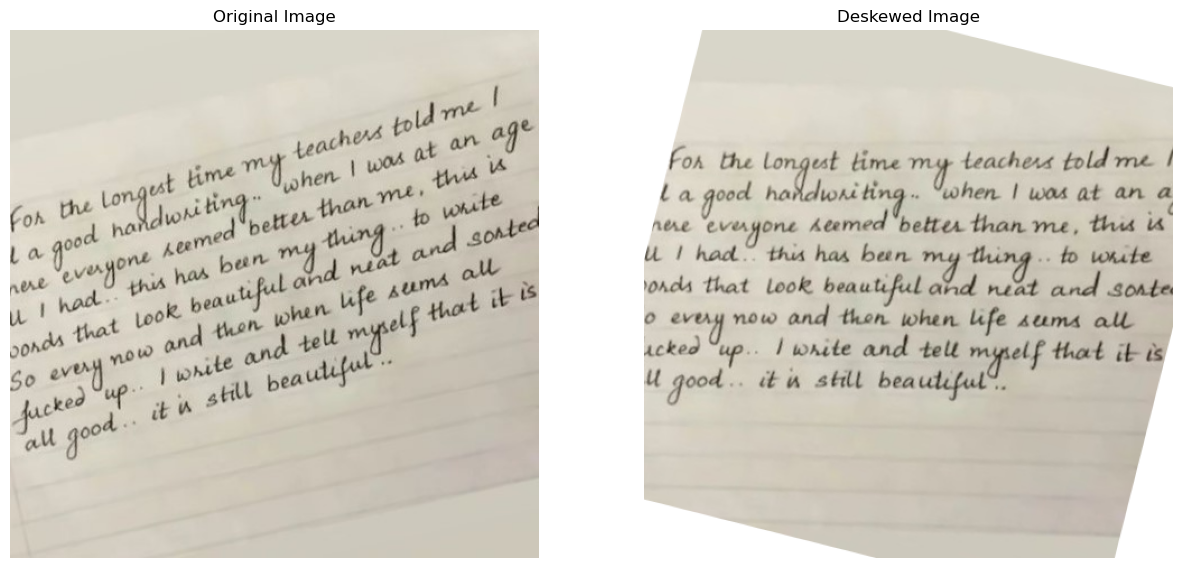

In [31]:
# Example usage
image_path = 'discord_test.jpg'
deskew_and_display(image_path,save_image=False)
